Firstly, import the libraries needed.

In [129]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns 
sns.set()

from IPython.display import Image
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

Now load the dataset.

In [130]:
df = pd.read_csv("students_not_enrolled.csv")
df["Target"] = df["Target"].map({"Dropout": 1, "Graduate": 0})

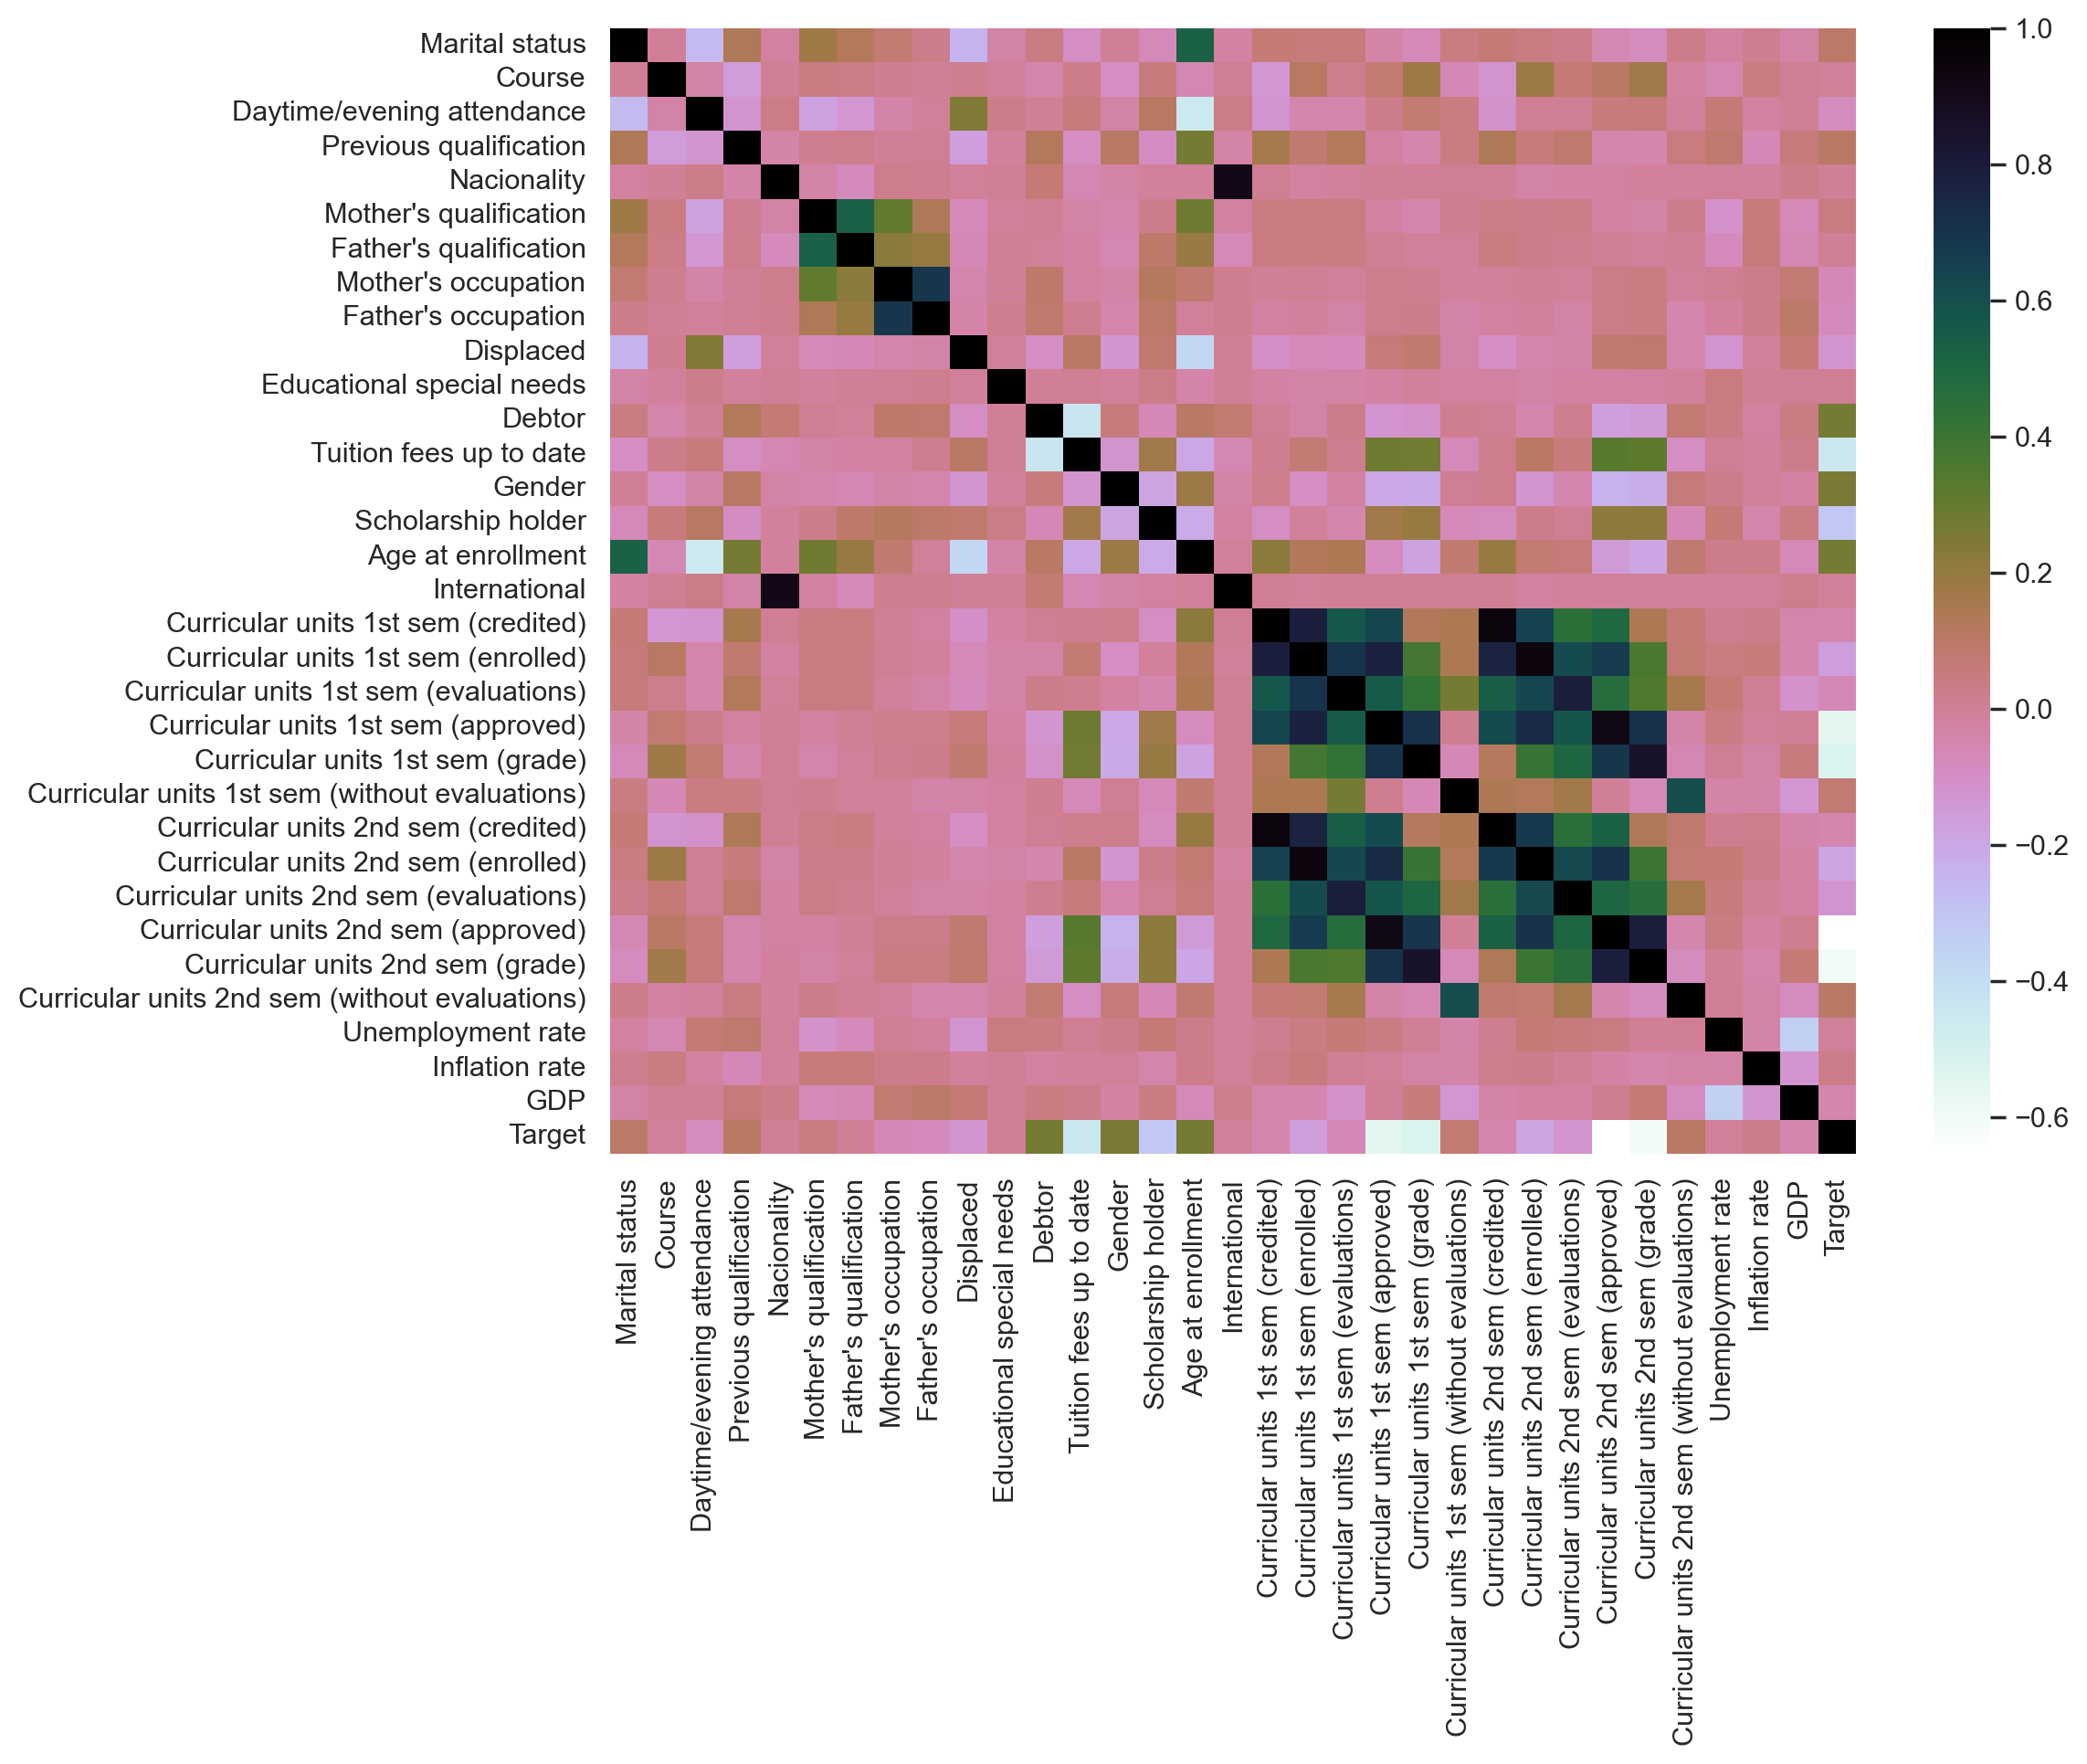

In [131]:

sns.heatmap(df.drop(columns = ["Application order","Application mode"]).corr(), cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [132]:
corr_matrix = df.drop(columns = ["Application order","Application mode"]).corr()
target_corr = corr_matrix["Target"]
significant_corr = target_corr[abs(target_corr) > 0.15]
significant_corr = significant_corr[significant_corr.index != "Target"]

print(significant_corr)

Debtor                                 0.267207
Tuition fees up to date               -0.442138
Gender                                 0.251955
Scholarship holder                    -0.313018
Age at enrollment                      0.267229
Curricular units 1st sem (enrolled)   -0.161074
Curricular units 1st sem (approved)   -0.554881
Curricular units 1st sem (grade)      -0.519927
Curricular units 2nd sem (enrolled)   -0.182897
Curricular units 2nd sem (approved)   -0.653995
Curricular units 2nd sem (grade)      -0.605350
Name: Target, dtype: float64


Now let's split the dataset to training set and testing set.

In [133]:
y = df["Target"]
X = df[significant_corr.index]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state=17) 

Now let's try methode KNN.

In [134]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8811959087332809

In [135]:
knn_params = {
              'n_neighbors':range(1,14)
                 }

knn_grid = GridSearchCV(knn, knn_params,
                           cv=12, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

Fitting 12 folds for each of 13 candidates, totalling 156 fits


GridSearchCV(cv=12, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 14)}, verbose=True)

In [136]:
knn_grid.best_params_,knn_grid.best_score_

({'n_neighbors': 7}, 0.886397579336303)

In [137]:
knn_best = knn_grid.best_estimator_
knn_best.score(X_test,y_test)

0.8945712037765539

Random Forest

In [138]:
forest = RandomForestClassifier(random_state=17)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.9087332808811959

In [139]:
forest_params = {'max_depth': range(2,8),
                 'max_features': ['sqrt'],
                 'n_estimators':[100,200,300]
                 }

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(2, 8), 'max_features': ['sqrt'],
                         'n_estimators': [100, 200, 300]},
             verbose=True)

In [140]:
forest_grid.best_params_,forest_grid.best_score_

({'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200},
 0.8999568174457518)

In [141]:
forest_best = forest_grid.best_estimator_
forest_best.score(X_test,y_test)

0.9087332808811959

SVM

In [142]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=17)
svm_lin = svm.SVC(kernel="poly")
svm_scores = cross_val_score(svm_lin, X_train, y_train, cv=skf, scoring='accuracy')
svm_lin.fit(X_train, y_train)
print(f'SVM Accuracy: {np.mean(svm_scores):.4f}')

SVM Accuracy: 0.8953


The random forest is the best in this case. So we will start the prediction with random forest.

In [143]:
df_pred = pd.read_csv("students_enrolled.csv")
df_pred["Target"] = 0

In [144]:
X = df_pred[significant_corr.index]
df_pred["Target"] = forest_best.predict(X)

In [145]:
df_pred.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,9,1,10,1,1,1,13,28,6,...,0,6,14,2,11.000,0,10.8,1.4,1.74,1
1,1,1,1,16,1,1,1,13,14,8,...,0,7,8,6,13.500,0,16.2,0.3,-0.92,0
2,1,9,4,13,1,1,1,1,28,5,...,0,8,9,8,11.425,0,12.7,3.7,-1.70,0
3,1,1,1,10,1,1,1,13,28,10,...,0,6,12,4,11.000,0,7.6,2.6,0.32,0
4,1,1,1,6,1,1,1,13,14,4,...,0,5,7,4,13.000,0,9.4,-0.8,-3.12,0


<Axes: >

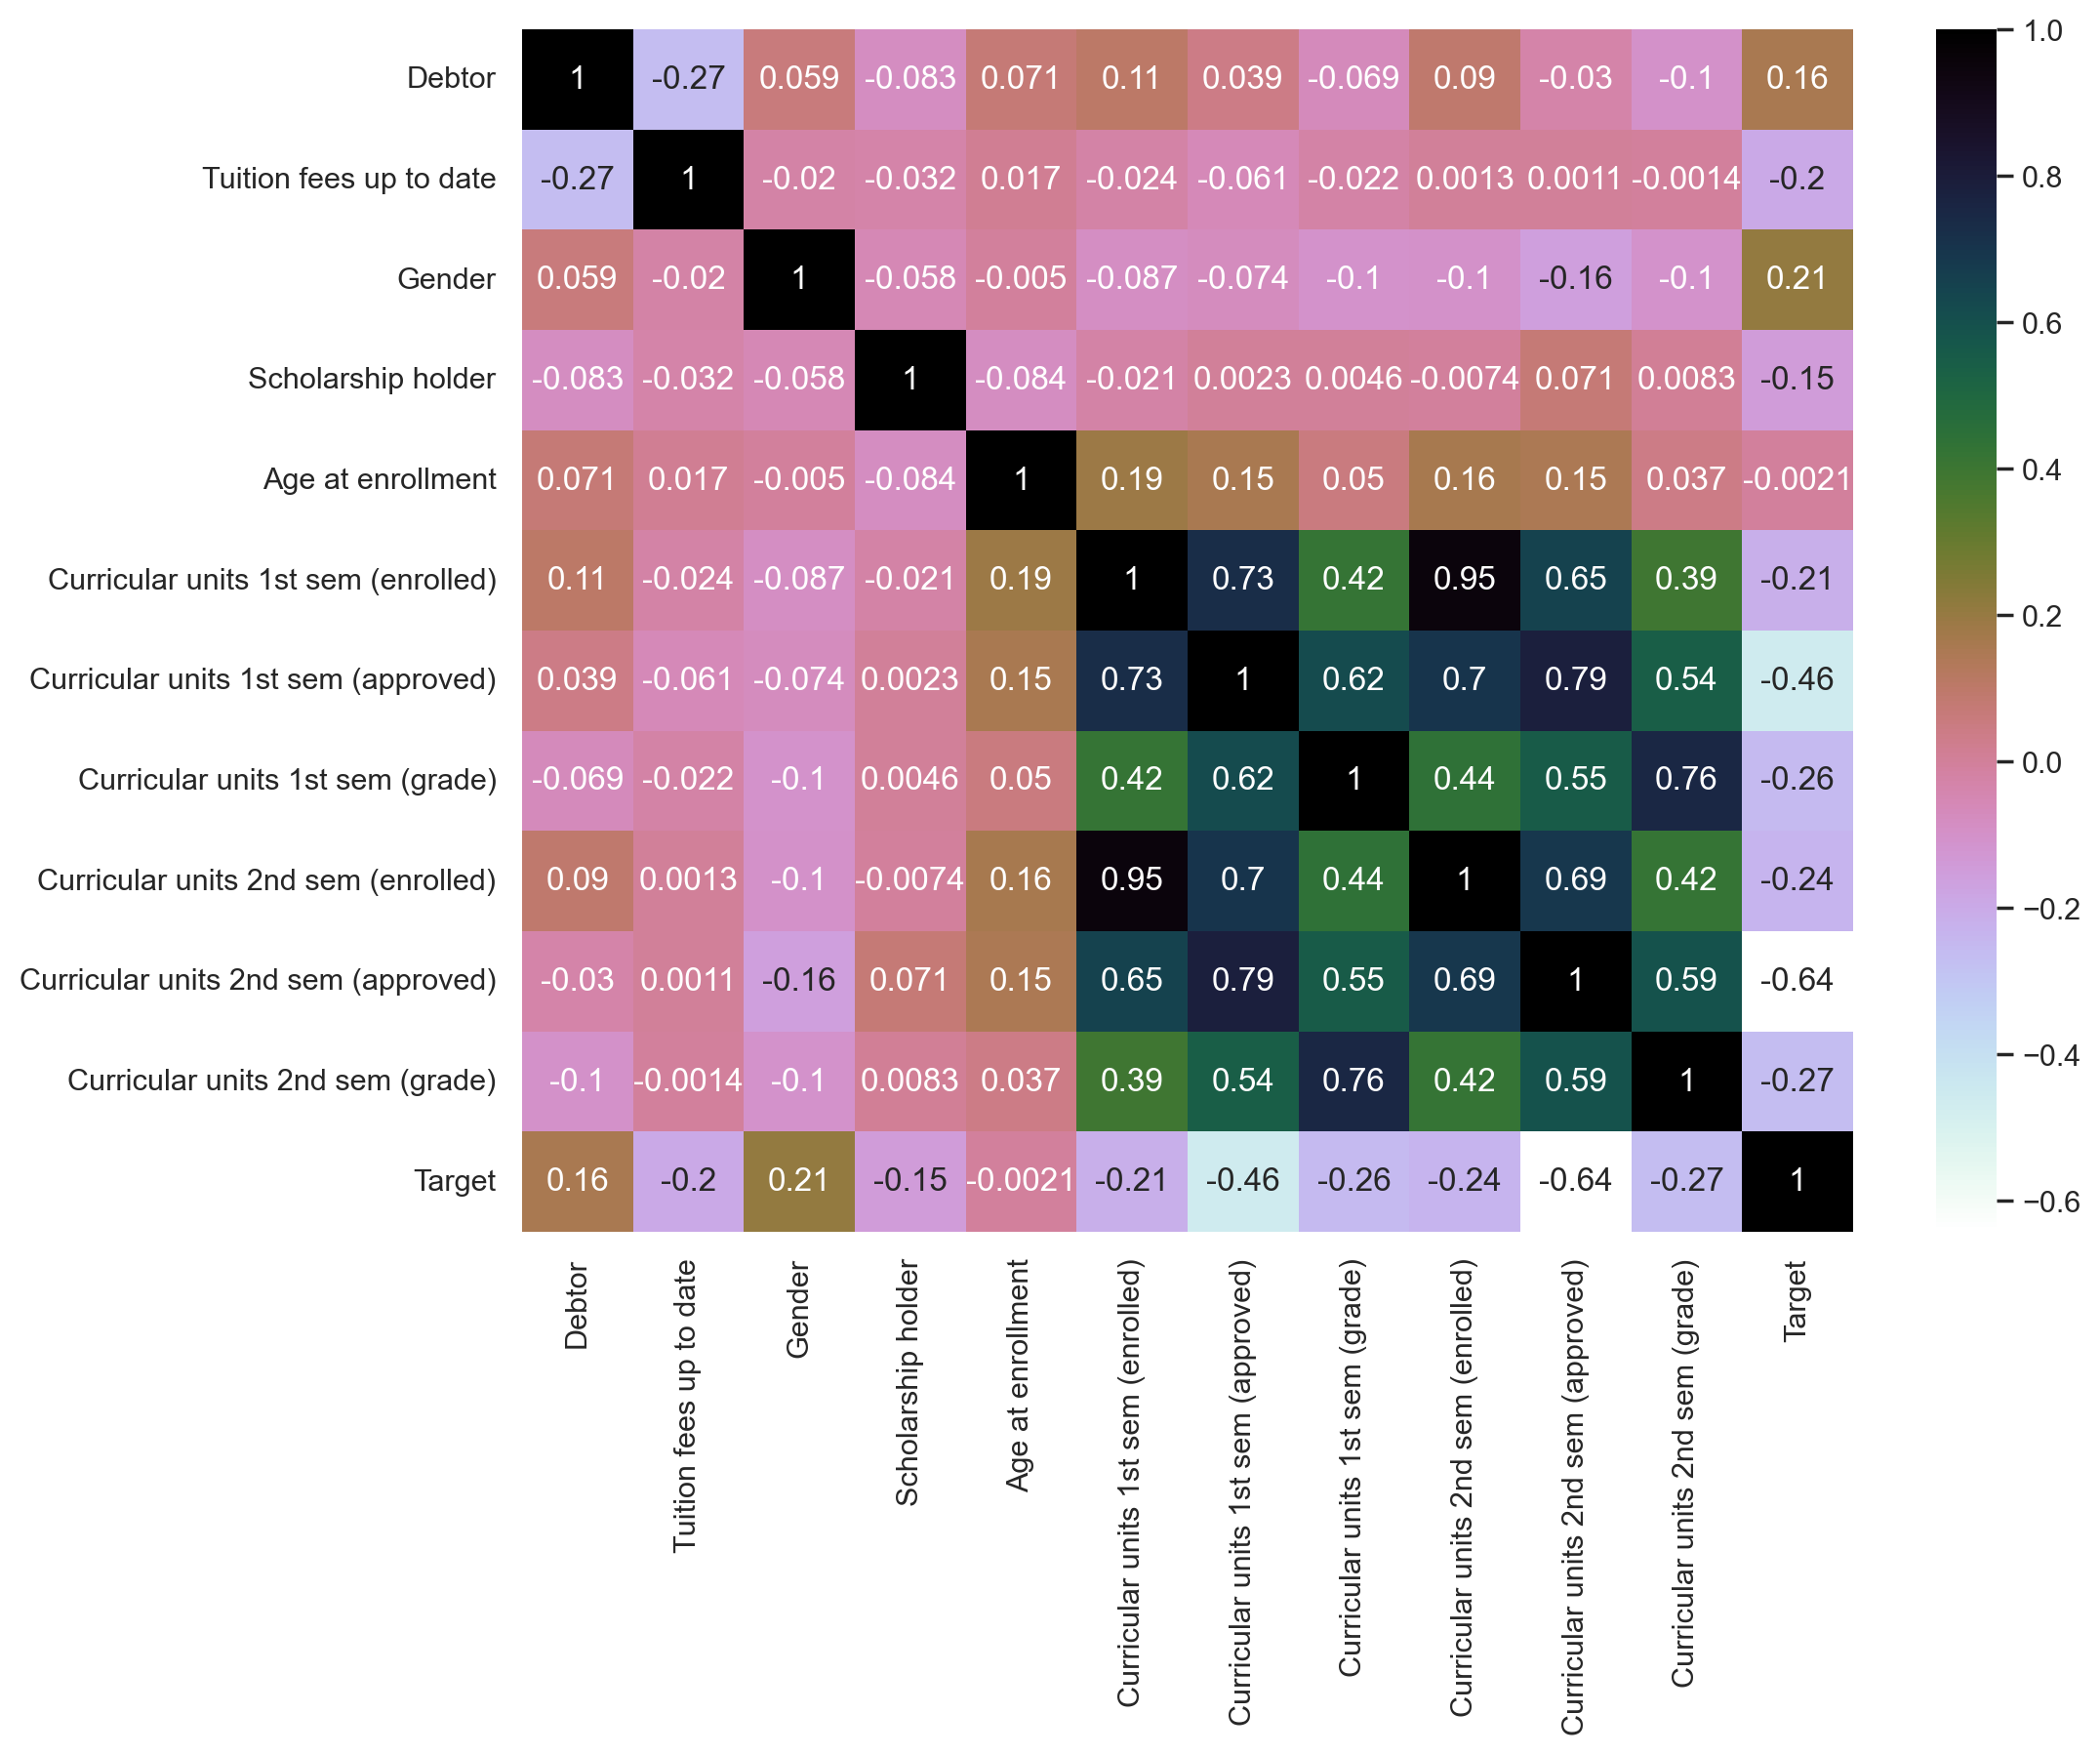

In [147]:
list1 = list(significant_corr.index)
list1.append("Target")
sns.heatmap(df_pred[list1].corr(), annot = True,cmap='cubehelix_r')

In [148]:
df_pred.groupby("Target")["Target"].count() 

Target
0    463
1    331
Name: Target, dtype: int64

Now let's see that really happens after the nomber of dropout.

In [149]:
df.groupby("Target")["Curricular units 1st sem (enrolled)"].mean()

Target
0    6.669534
1    5.821253
Name: Curricular units 1st sem (enrolled), dtype: float64

In [150]:
df["ratio of pass 1 st"] = df["Curricular units 1st sem (approved)"]/df["Curricular units 1st sem (enrolled)"]

In [151]:
df.groupby("Target")["ratio of pass 1 st"].mean()

Target
0    0.934967
1    0.405994
Name: ratio of pass 1 st, dtype: float64

In [152]:
df.groupby("Target")["Curricular units 1st sem (approved)"].mean()

Target
0    6.232232
1    2.551724
Name: Curricular units 1st sem (approved), dtype: float64

Now let's see what caused this problem.

In [153]:
corr_matrix = df.drop(columns = ["Target","Application order","Application mode","Curricular units 1st sem (grade)","Curricular units 2nd sem (grade)","Curricular units 1st sem (approved)","Curricular units 1st sem (approved)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (credited)","Curricular units 1st sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (evaluations)"]).corr()
target_corr = corr_matrix["ratio of pass 1 st"]
significant_corr = target_corr[abs(target_corr) > 0.15]


print(significant_corr)

Displaced                  0.167052
Debtor                    -0.171553
Tuition fees up to date    0.376729
Gender                    -0.239538
Scholarship holder         0.286674
Age at enrollment         -0.284337
ratio of pass 1 st         1.000000
Name: ratio of pass 1 st, dtype: float64


<Axes: >

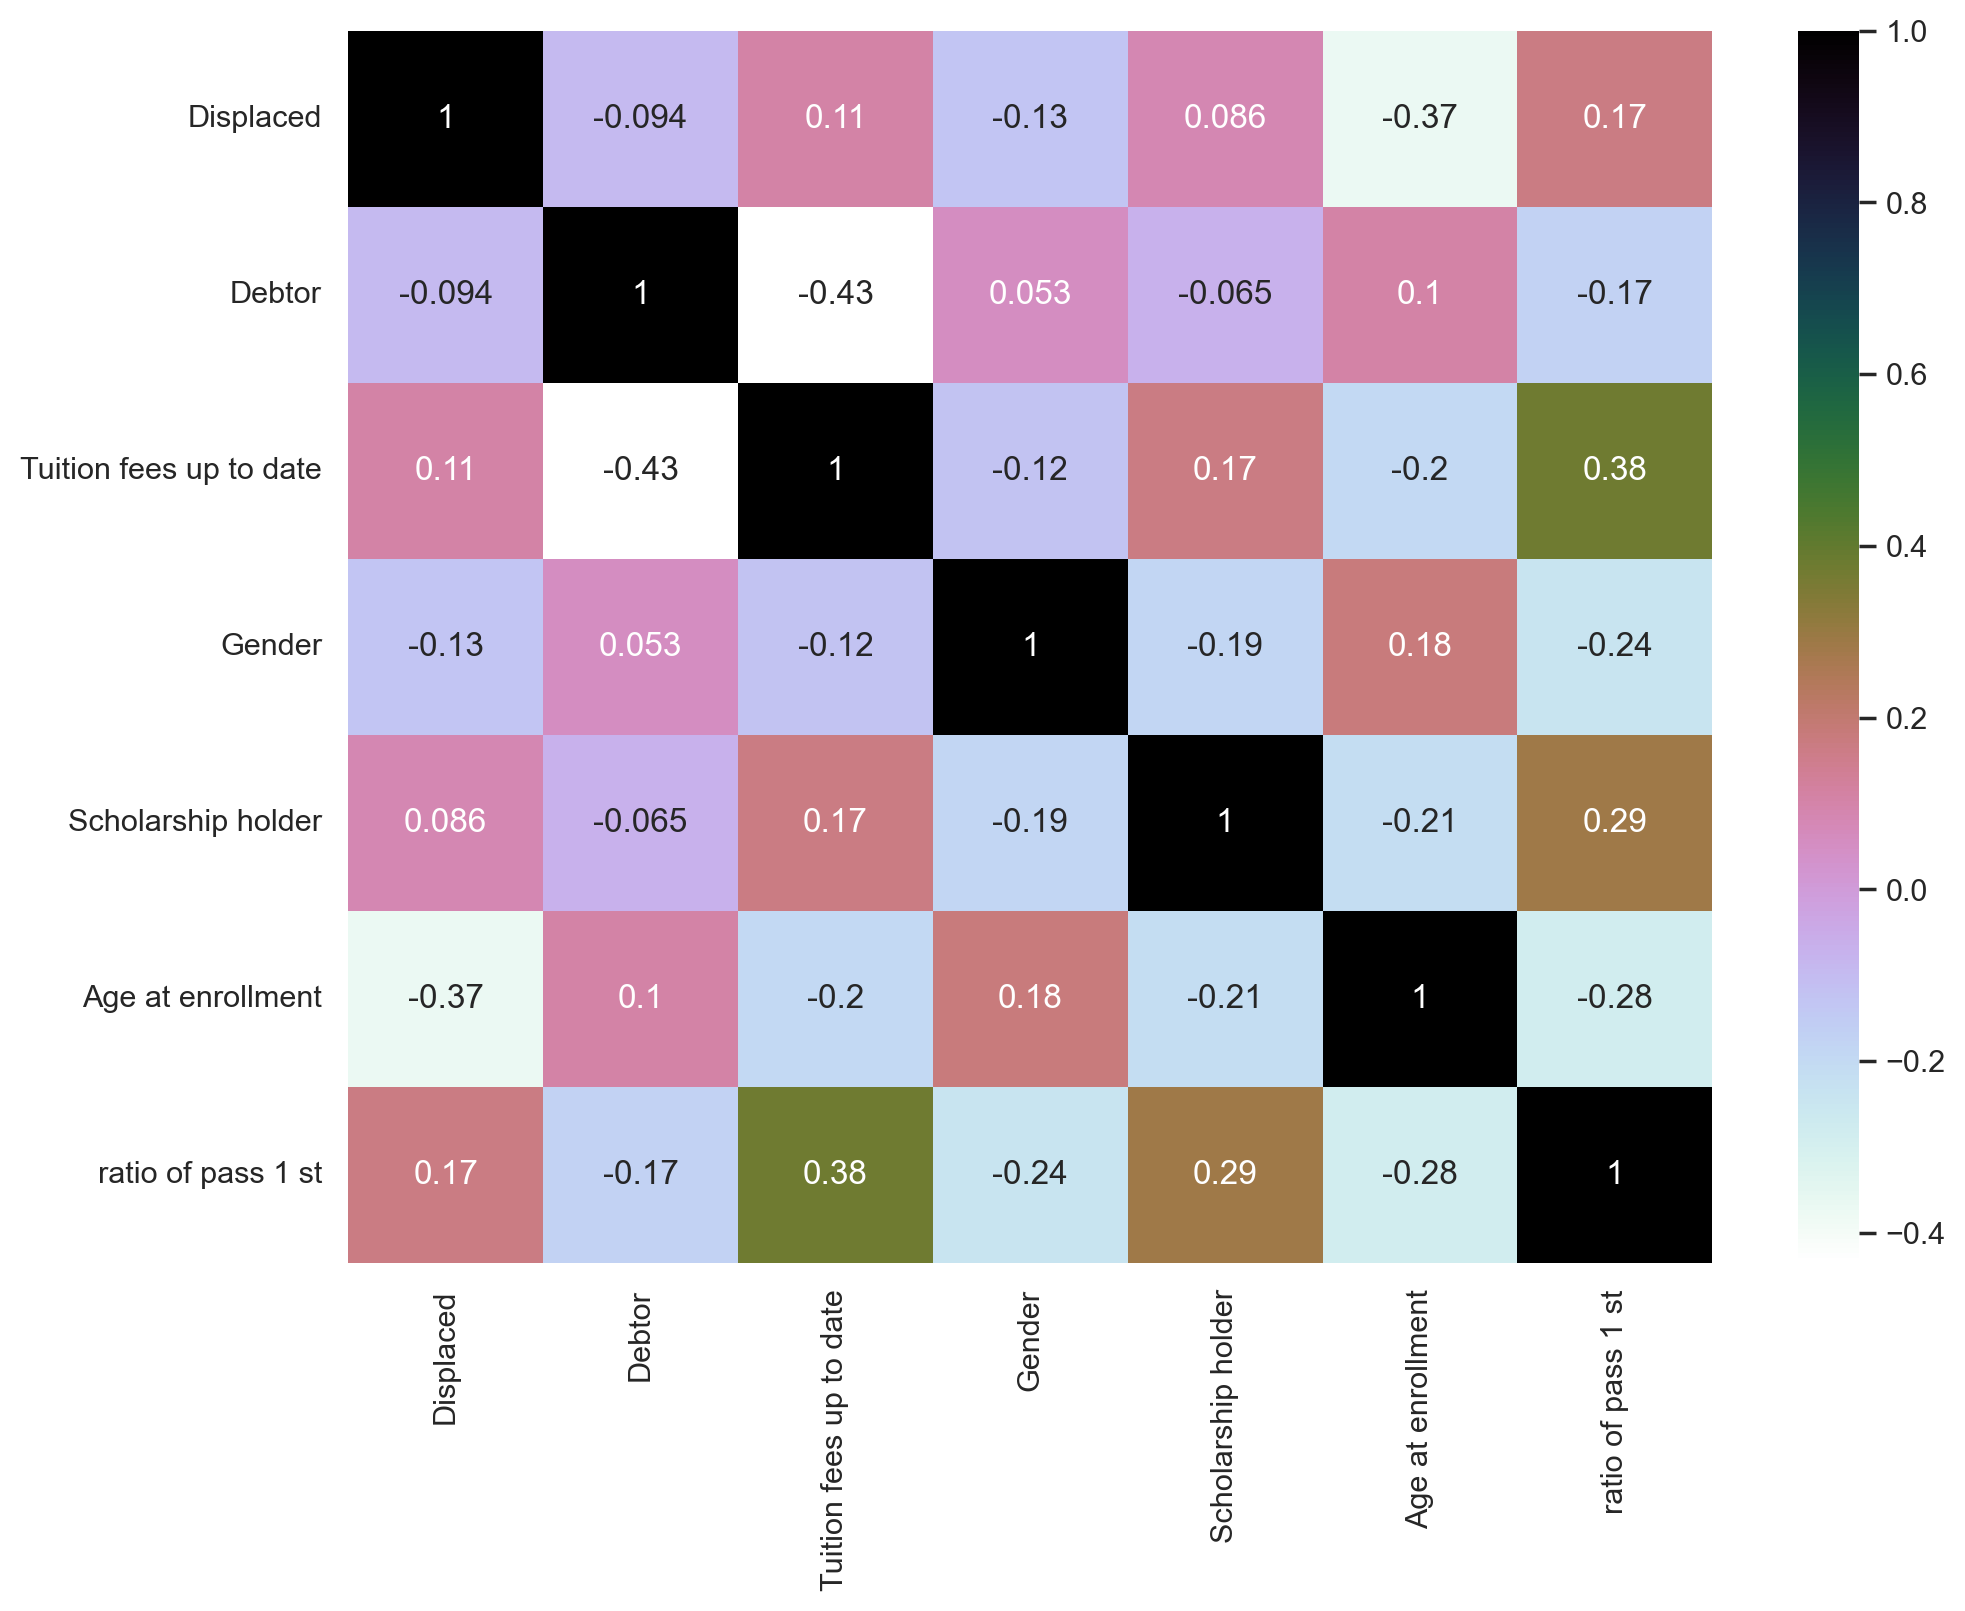

In [154]:

sns.heatmap(df[significant_corr.index].corr(), annot = True,cmap='cubehelix_r')